In [1]:
import torch
from torchvision import datasets, transforms

batch_size = 100
test_batch_size = 10

transform = transforms.ToTensor()

train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True, transform=transform),
        batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transform),
        batch_size=test_batch_size, shuffle=False)
gmm_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True, transform=transform),
        batch_size=3000, shuffle=True)

X_MNIST = enumerate(gmm_loader).__next__()[1][0].view(gmm_loader.batch_size, 784)

In [2]:
X_MNIST.numpy().shape

(3000, 784)

In [3]:
from sklearn.cluster import KMeans
import numpy as np

In [96]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
#import seaborn as sns
from matplotlib import patches

def plot_2d_sample(sample, mu=None, sig=None, idx=(0,1)):
    """
    :param sample: 
    :param mu:
    :param sig: 
    :return:
    """
    #fig = plt.figure(figsize=(5, 5))
    ax = plt.gca()
    ax.cla()
    
    sample_np = sample.numpy()
    x = sample_np[:, idx[0]]
    y = sample_np[:, idx[1]]
    ax.scatter(x, y)

    if (mu is not None and sig is not None):
        for i in range(mu.shape[0]):
            ellipse = patches.Ellipse( (mu[i,idx[0]], mu[i,idx[1]]) , sig[i], sig[i], color='r', fill=False) 
            ax.add_artist(ellipse)
    plt.axis('equal')
    plt.show()

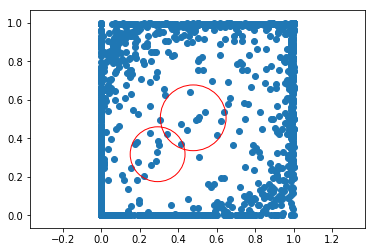

In [32]:
plot_2d_sample(X_MNIST, kmeans.cluster_centers_, var_list ,idx=(345,346))

In [35]:
K = 1000
kmeans = KMeans(n_clusters=K, random_state=0).fit(X_MNIST)
index = kmeans.predict(X_MNIST)
var_list = np.zeros(K)
for i in range(K):
    var_list[i] = X_MNIST.numpy()[index==i,:].std()

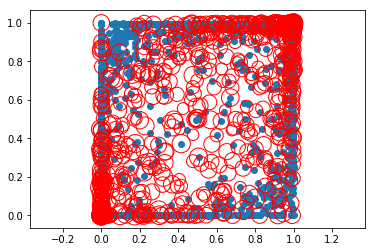

In [37]:
plot_2d_sample(X_MNIST, kmeans.cluster_centers_, var_list/4 ,idx=(345,346))

In [38]:
K = 1000
kmeans = KMeans(n_clusters=K, random_state=0, init='random').fit(X_MNIST)
index = kmeans.predict(X_MNIST)
var_list = np.zeros(K)
for i in range(K):
    var_list[i] = X_MNIST.numpy()[index==i,:].std()

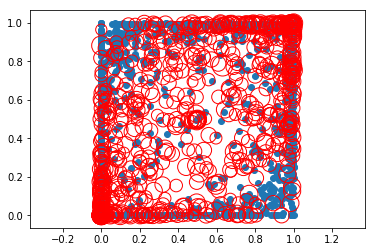

In [39]:
plot_2d_sample(X_MNIST, kmeans.cluster_centers_, var_list/4 ,idx=(345,346))

In [149]:
K = 200
kmeans = KMeans(n_clusters=K, random_state=0, max_iter=300).fit(X_MNIST)
index = kmeans.predict(X_MNIST)
var_list = np.zeros(K)
for i in range(K):
    var_list[i] = np.linalg.norm(X_MNIST.numpy()[index==i,:]-kmeans.cluster_centers_[i,:], axis=1).mean()

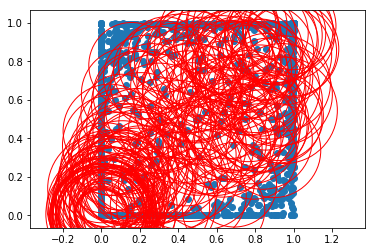

In [150]:
plot_2d_sample(X_MNIST, kmeans.cluster_centers_, var_list/10 ,idx=(345,346))

In [112]:
var_list.max()

1.192684365647055

In [144]:
np.linalg.norm(X_MNIST.numpy()[index==i,:]-kmeans.cluster_centers_[i,:], axis=1).mean()

6.536226641223095

In [94]:
np.linalg.norm(X_MNIST.numpy()[index==i,:]-kmeans.cluster_centers_[i,:], axis=1).std()

0.8077044139499037

In [53]:
mu = kmeans.cluster_centers_

In [102]:
X_MNIST.numpy()[index==i,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [103]:
index

array([ 9,  6, 12, ...,  5,  1,  2], dtype=int32)

In [107]:
kmeans.labels_

array([ 9,  6, 12, ...,  5,  1,  2], dtype=int32)

In [113]:
X_MNIST.shape

torch.Size([3000, 784])

In [115]:
mu.shape

(2, 784)

In [132]:
index = (X_MNIST[:,None,:]-torch.tensor(mu[None,:,:],dtype=torch.float)).norm(dim=2).min(dim=1)[1]

In [138]:
X_MNIST[index==0,:].norm(dim=1)

tensor(8.7403)